# Data Analysis Two Cosmic Watches

## Import Libraries and Data


In [2]:
# imports some software packages we'll use
import pandas as pd #Pandas lets us name the columns of our data more likea spread sheet.
import numpy as np #Numpy is used by pandas for calculatiions
%matplotlib inline
import matplotlib as mpl #For ploting data
import matplotlib.pyplot as plt #For typing less when poloting data
import math #for other math we might do.

inline_rc = dict(mpl.rcParams) #Sets Parameters for plots.

# Set A
dataA = pd.read_csv('P_2024_06_21_FILEM001.csv')
lastRowA = dataA.iloc[-1]
print("Primary:")
print(lastRowA)
print(" ")

# Set B
dataB = pd.read_csv('S_2024_06_21_FILES001.csv')
lastRowB = dataB.iloc[-1]
print("Secondary:")
print(lastRowB)

# This makes a histogram of that totally useless calculation above
plt.figure(figsize=(10,5))
plt.hist(dataA.SiPM, bins=50, range=[0,175], log=False)
plt.hist(dataB.SiPM, bins=50, range=[0,175], log=False)
plt.title("mV for Each Event")
plt.xlabel("SiPM [mV]")
plt.ylabel("Events");


ModuleNotFoundError: No module named 'pandas'

## Calculate and Plot Rate Every Min

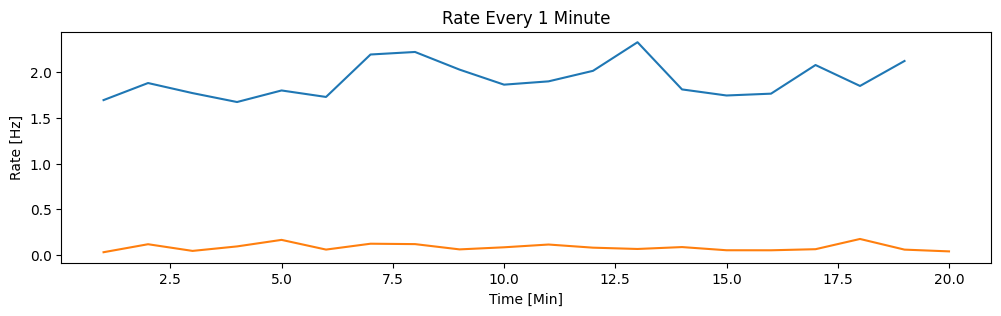

In [2]:
#### Set A
dataA['UpTime'] = (dataA.RunTime - dataA.DownTime)
dataA['Time'] = pd.to_timedelta(dataA.UpTime, unit='ms')
dataA['Minute']= (dataA.UpTime/(60000))
dataA.Minute = (dataA.Minute).astype(int)
dataA['avgRate'] = dataA.Event/(dataA.UpTime/1000)

Data1MinA = dataA.drop_duplicates(subset=['Minute'], keep='first')
Data1MinA = Data1MinA.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data1MinA['DeltaCount'] = Data1MinA.Event - Data1MinA.Event.shift(1)
Data1MinA['DeltaUpTime'] = Data1MinA.UpTime - Data1MinA.UpTime.shift(1)
Data1MinA['Rate'] = Data1MinA.DeltaCount / (Data1MinA.DeltaUpTime /1000)

#### Set B
dataB['UpTime'] = (dataB.RunTime - dataB.DownTime)
dataB['Time'] = pd.to_timedelta(dataB.UpTime, unit='ms')
dataB['Minute']= (dataB.UpTime/(60000))
dataB.Minute = (dataB.Minute).astype(int)
dataB ['avgRate'] = dataB.Event/(dataB.UpTime/1000)
dataB

Data1MinB = dataB.drop_duplicates(subset=['Minute'], keep='first')
Data1MinB = Data1MinB.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data1MinB['DeltaCount'] = Data1MinB.Event - Data1MinB.Event.shift(1)
Data1MinB['DeltaUpTime'] = Data1MinB.UpTime - Data1MinB.UpTime.shift(1)
Data1MinB['Rate'] = Data1MinB.DeltaCount / (Data1MinB.DeltaUpTime /1000)

# Plot
plt.figure(figsize=(12,3))
plt.plot(Data1MinA.Minute,Data1MinA.Rate)
plt.plot(Data1MinB.Minute,Data1MinB.Rate)
plt.title("Rate Every 1 Minute")
plt.xlabel("Time [Min]")
plt.ylabel("Rate [Hz]");

## Calculate and Plot Rate Every 5 Min

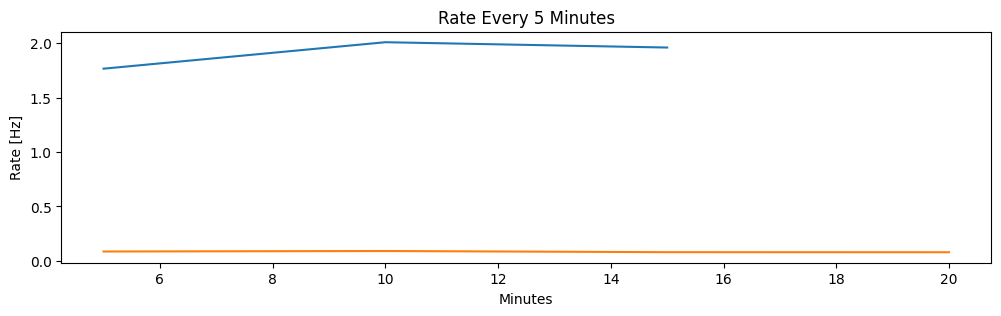

In [3]:
# Set A
Data5MinA = Data1MinA.query('Minute % 5 == 0')
Data5MinA = Data5MinA.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data5MinA['DeltaCount'] = Data5MinA.Event - Data5MinA.Event.shift(1)
Data5MinA['DeltaUpTime'] = Data5MinA.UpTime - Data5MinA.UpTime.shift(1)
Data5MinA['Rate'] = Data5MinA.DeltaCount / (Data5MinA.DeltaUpTime /1000)


#Set B
Data5MinB = Data1MinB.query('Minute % 5 == 0')
Data5MinB = Data5MinB.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data5MinB['DeltaCount'] = Data5MinB.Event - Data5MinB.Event.shift(1)
Data5MinB['DeltaUpTime'] = Data5MinB.UpTime - Data5MinB.UpTime.shift(1)
Data5MinB['Rate'] = Data5MinB.DeltaCount / (Data5MinB.DeltaUpTime /1000)

# Plot
plt.figure(figsize=(12,3))
plt.plot(Data5MinA.Minute,Data5MinA.Rate)
plt.plot(Data5MinB.Minute,Data5MinB.Rate)
plt.title("Rate Every 5 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");


## Calculate and Plot Rate Every 20 Min

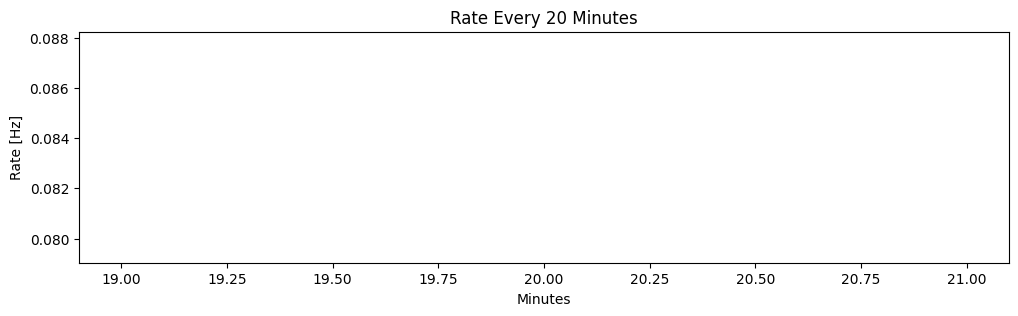

In [4]:
# Set A
Data20MinA = Data1MinA.query('Minute % 20 == 0')
Data20MinA = Data20MinA.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data20MinA['DeltaCount'] = Data20MinA.Event - Data20MinA.Event.shift(1)
Data20MinA['DeltaUpTime'] = Data20MinA.UpTime - Data20MinA.UpTime.shift(1)
Data20MinA['Rate'] = Data20MinA.DeltaCount / (Data20MinA.DeltaUpTime /1000)

# Set B
Data20MinB = Data1MinB.query('Minute % 20 == 0')
Data20MinB = Data20MinB.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data20MinB['DeltaCount'] = Data20MinB.Event - Data20MinB.Event.shift(1)
Data20MinB['DeltaUpTime'] = Data20MinB.UpTime - Data20MinB.UpTime.shift(1)
Data20MinB['Rate'] = Data20MinB.DeltaCount / (Data20MinB.DeltaUpTime /1000)

plt.figure(figsize=(12,3))
plt.plot(Data20MinA.Minute,Data20MinA.Rate)
plt.plot(Data20MinB.Minute,Data20MinB.Rate)
plt.title("Rate Every 20 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");